<a href="https://colab.research.google.com/github/Arta-DS/py_analytics_HWs/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными.

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('daily-total-female-births-in-cal.csv', index_col='Date', parse_dates=True)
print(df.columns)

Index(['Count'], dtype='object')


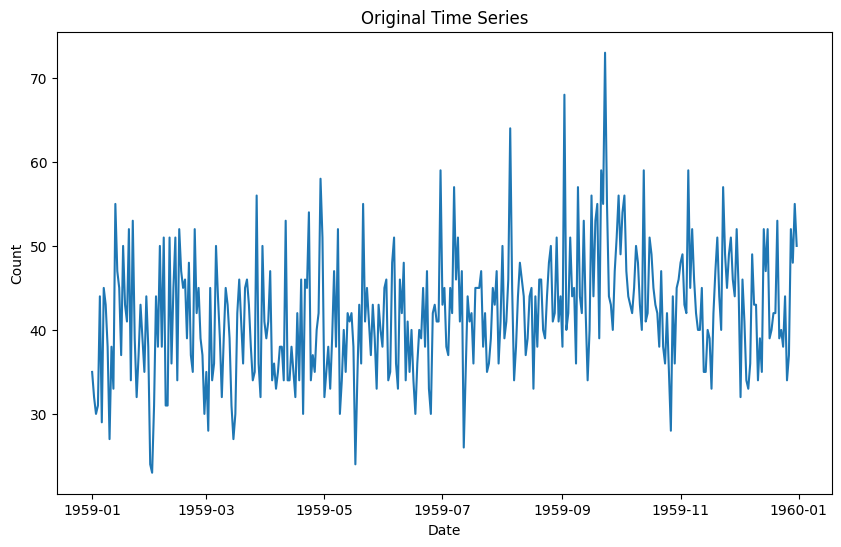

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Count'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [11]:
def test_stationarity(timeseries):
    # Определим rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

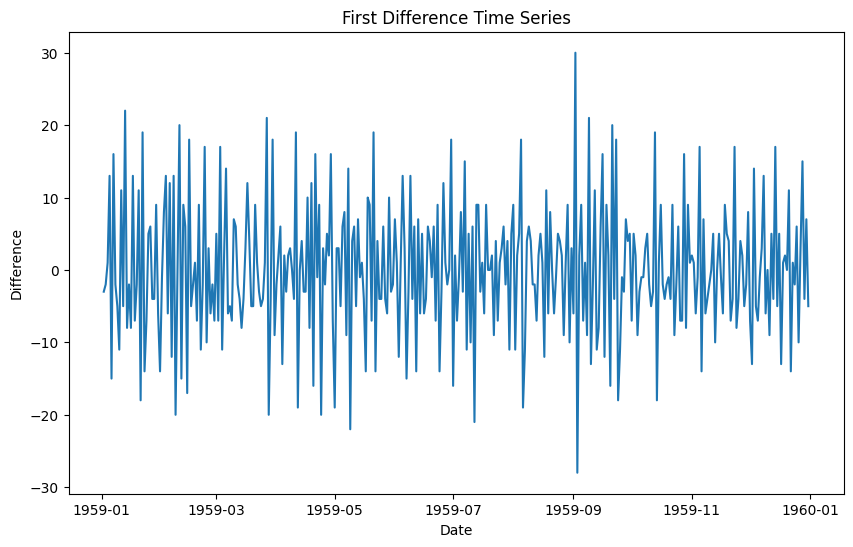

In [13]:
diff_series = df['Count'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_series.index, diff_series)
plt.title('First Difference Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

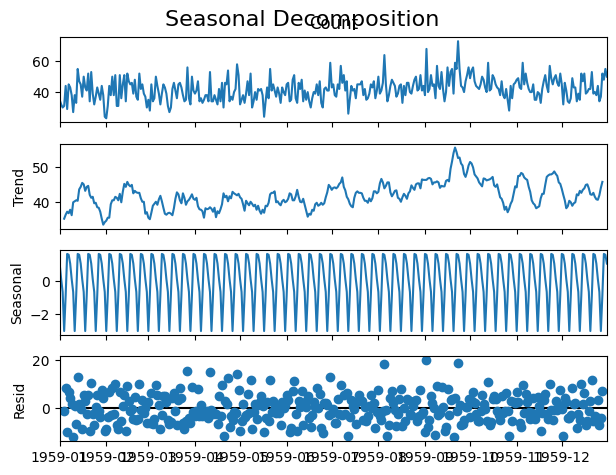

In [16]:
result = seasonal_decompose(df['Count'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


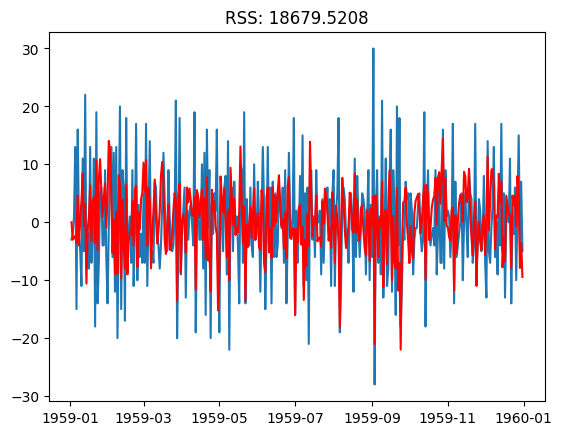

In [22]:
model = ARIMA(diff_series, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_series.index, diff_series)
plt.plot(diff_series.index, results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_series)**2))
plt.show()

In [25]:
df = pd.read_csv('international-airline-passengers.csv', index_col='Month', parse_dates=True)
print(df.columns)

Index(['Count'], dtype='object')


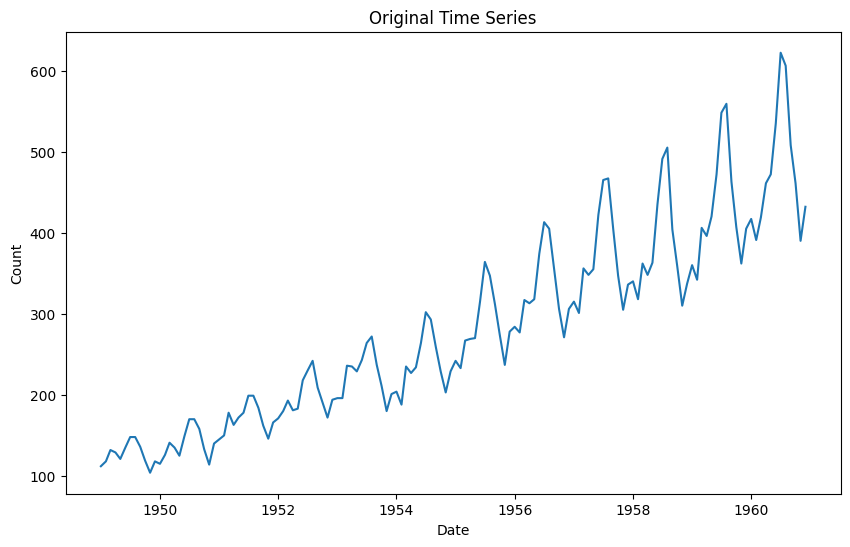

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Count'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

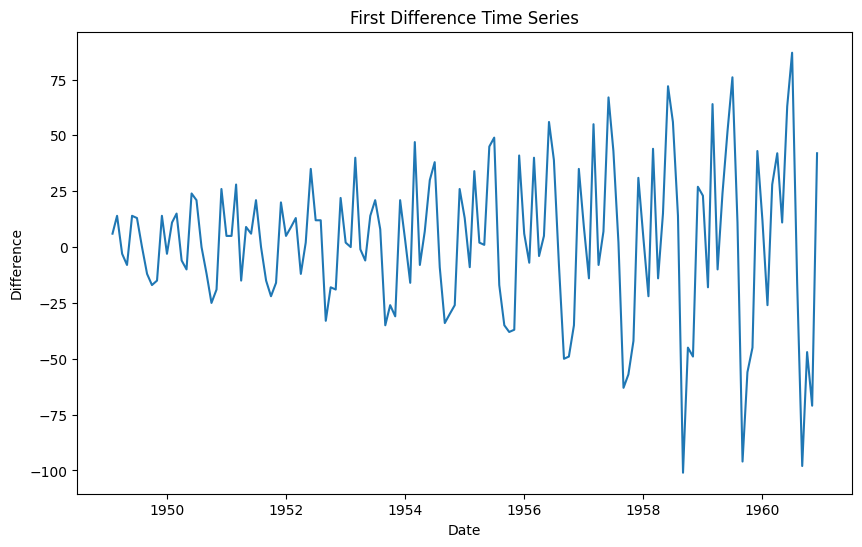

In [31]:
diff_series = df['Count'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_series.index, diff_series)
plt.title('First Difference Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

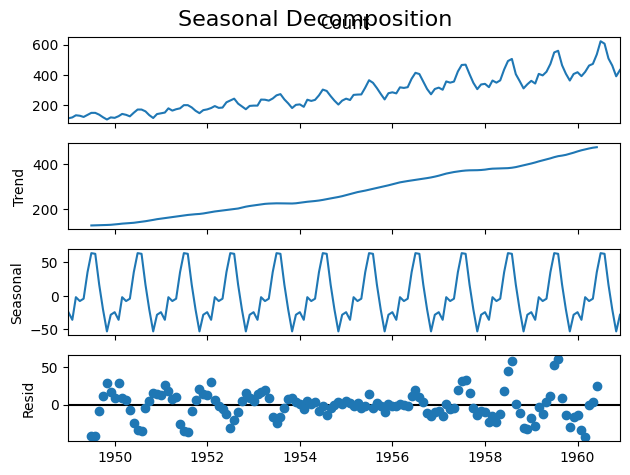

In [32]:
result = seasonal_decompose(df['Count'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


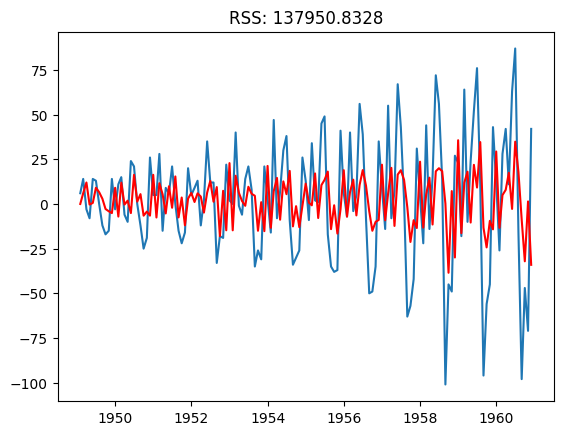

In [33]:
model = ARIMA(diff_series, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_series.index, diff_series)
plt.plot(diff_series.index, results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_series)**2))
plt.show()

In [35]:
df = pd.read_csv('mean-monthly-air-temperature-deg.csv', index_col='Month', parse_dates=True)
print(df.columns)

Index(['Deg'], dtype='object')


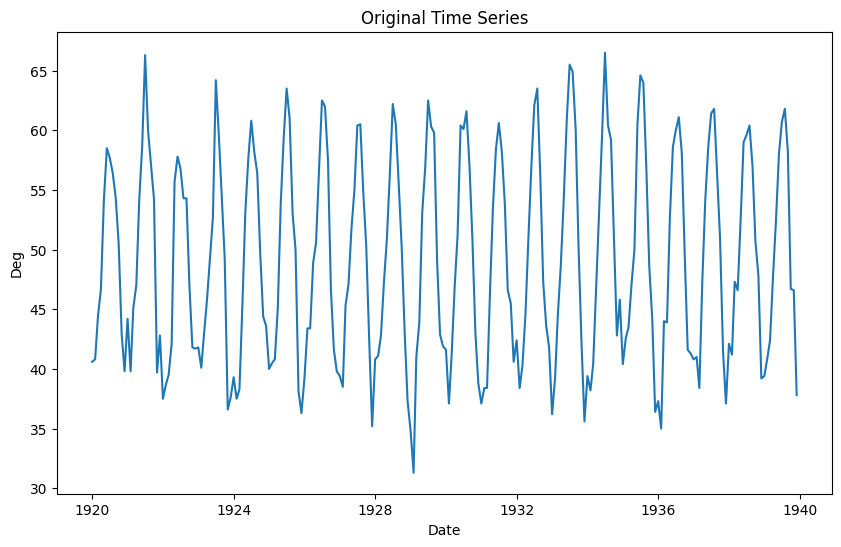

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Deg'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Deg')
plt.show()

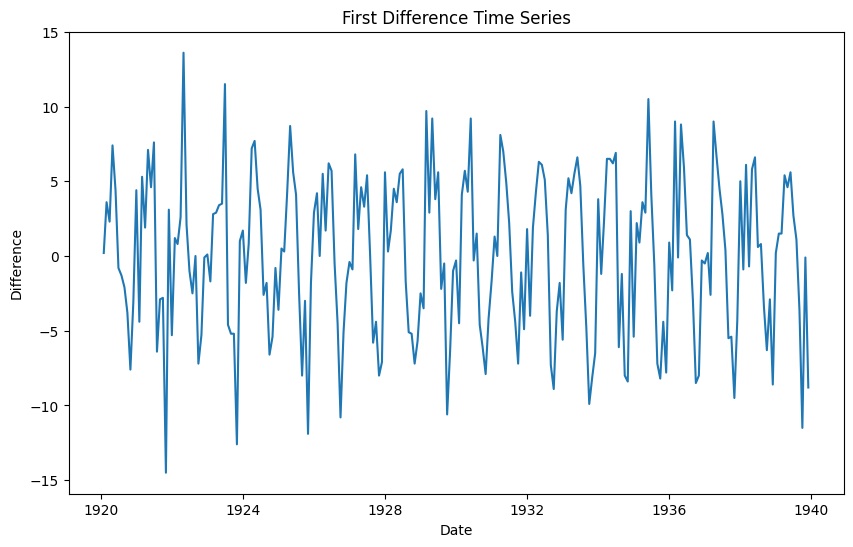

In [38]:
diff_series = df['Deg'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_series.index, diff_series)
plt.title('First Difference Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

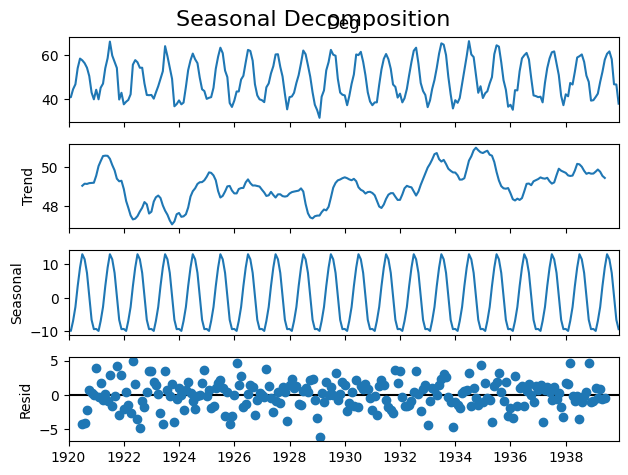

In [40]:
result = seasonal_decompose(df['Deg'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


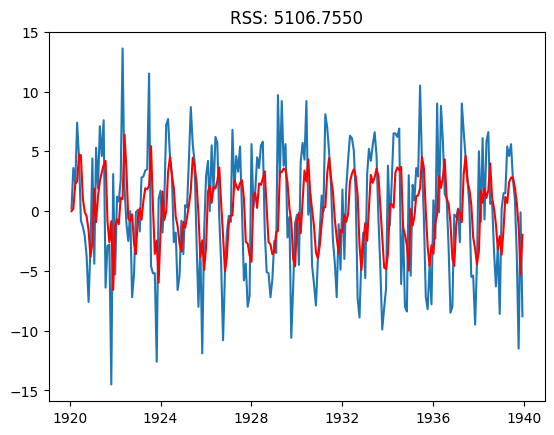

In [41]:
model = ARIMA(diff_series, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_series.index, diff_series)
plt.plot(diff_series.index, results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_series)**2))
plt.show()

In [42]:
df = pd.read_csv('monthly-boston-armed-robberies-j.csv', index_col='Month', parse_dates=True)
print(df.columns)

Index(['Count'], dtype='object')


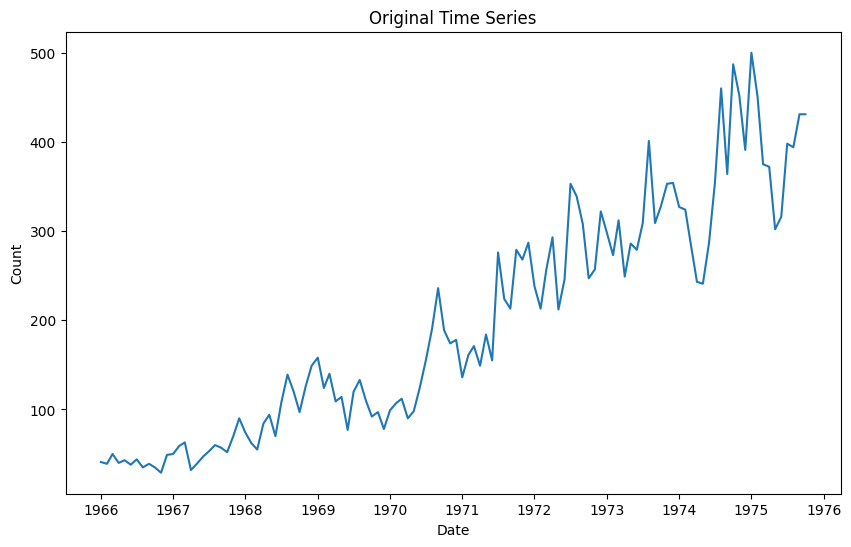

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Count'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

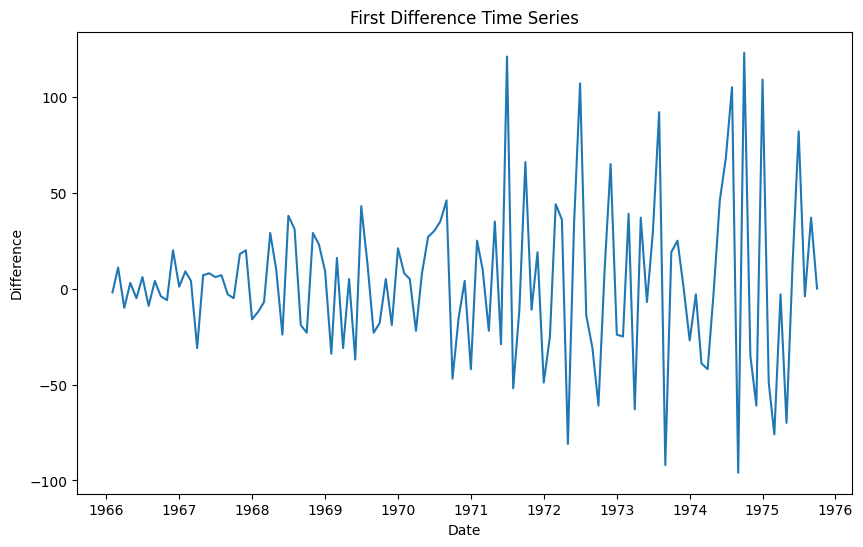

In [44]:
diff_series = df['Count'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_series.index, diff_series)
plt.title('First Difference Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

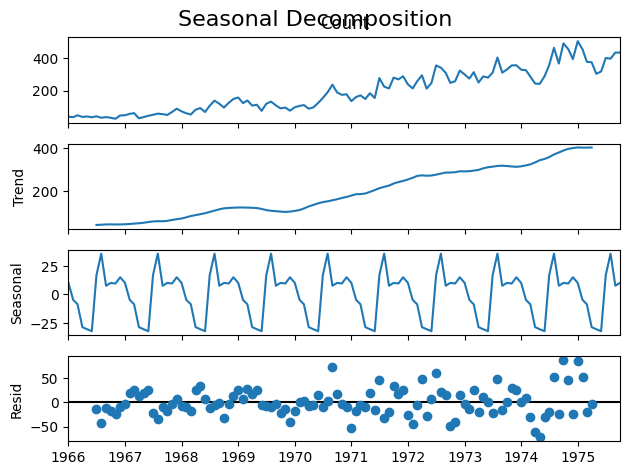

In [45]:
result = seasonal_decompose(df['Count'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


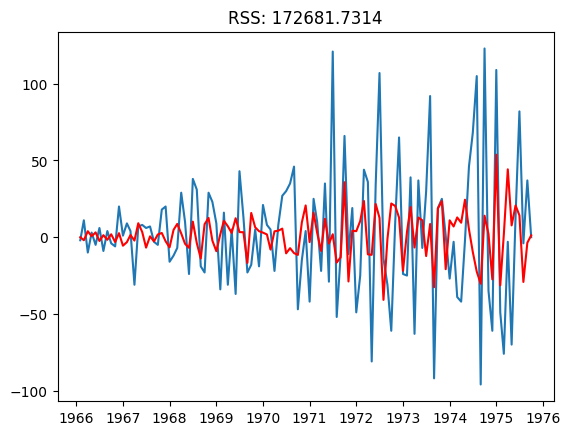

In [46]:
model = ARIMA(diff_series, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_series.index, diff_series)
plt.plot(diff_series.index, results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_series)**2))
plt.show()

In [47]:
df = pd.read_csv('monthly-sales-of-company-x-jan-6.csv', index_col='Month', parse_dates=True)
print(df.columns)

Index(['Count'], dtype='object')


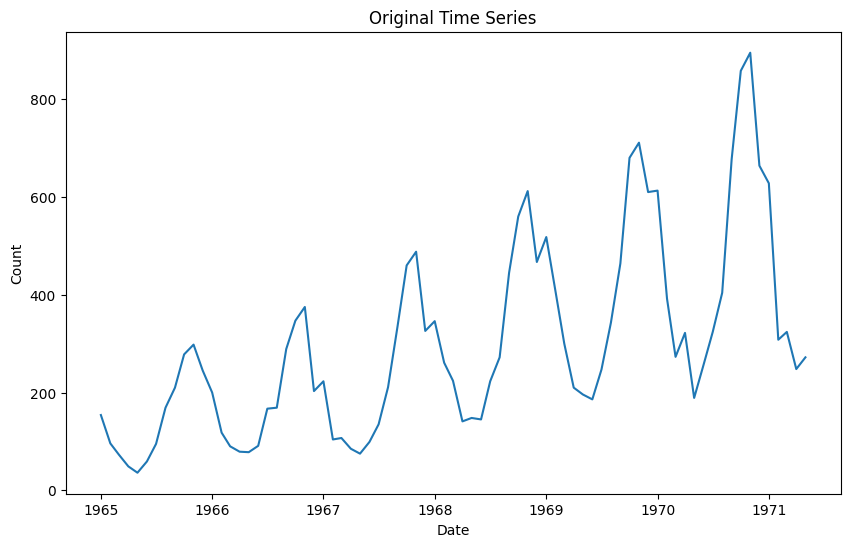

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Count'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

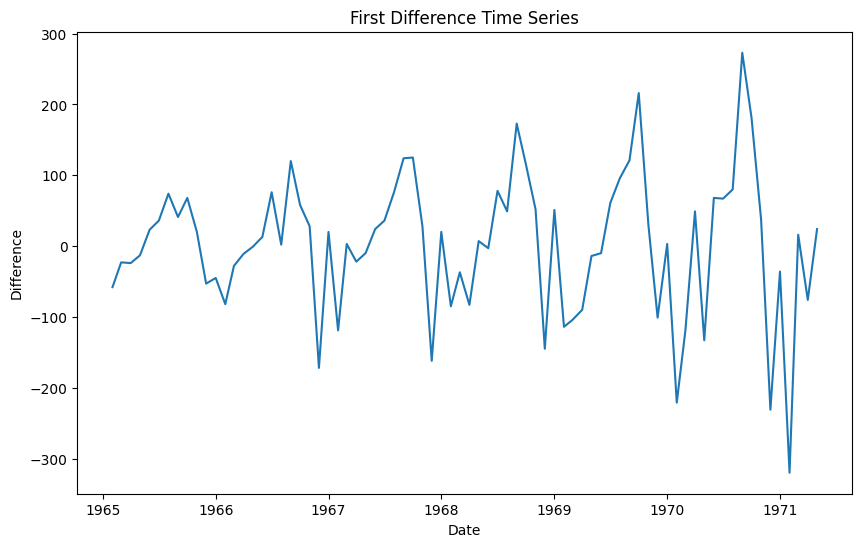

In [49]:
diff_series = df['Count'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_series.index, diff_series)
plt.title('First Difference Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

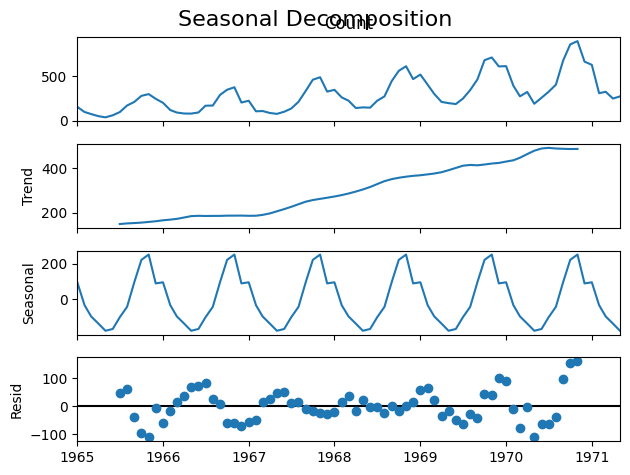

In [50]:
result = seasonal_decompose(df['Count'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

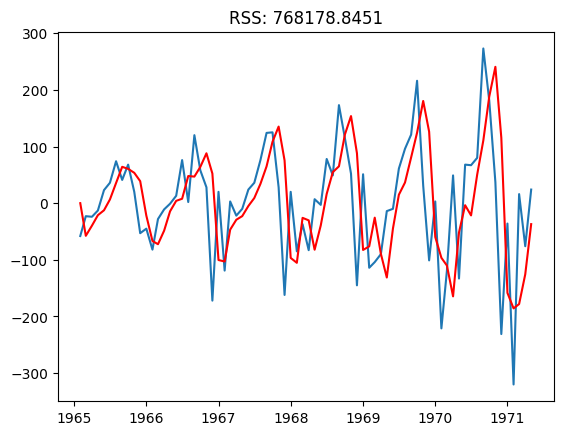

In [51]:
model = ARIMA(diff_series, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_series.index, diff_series)
plt.plot(diff_series.index, results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_series)**2))
plt.show()

In [54]:
df = pd.read_csv('weekly-closings-of-the-dowjones-.csv', index_col='Week', parse_dates=True)
print(df.columns)

Index(['Close'], dtype='object')


<ipython-input-54-a624bdae854d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('weekly-closings-of-the-dowjones-.csv', index_col='Week', parse_dates=True)


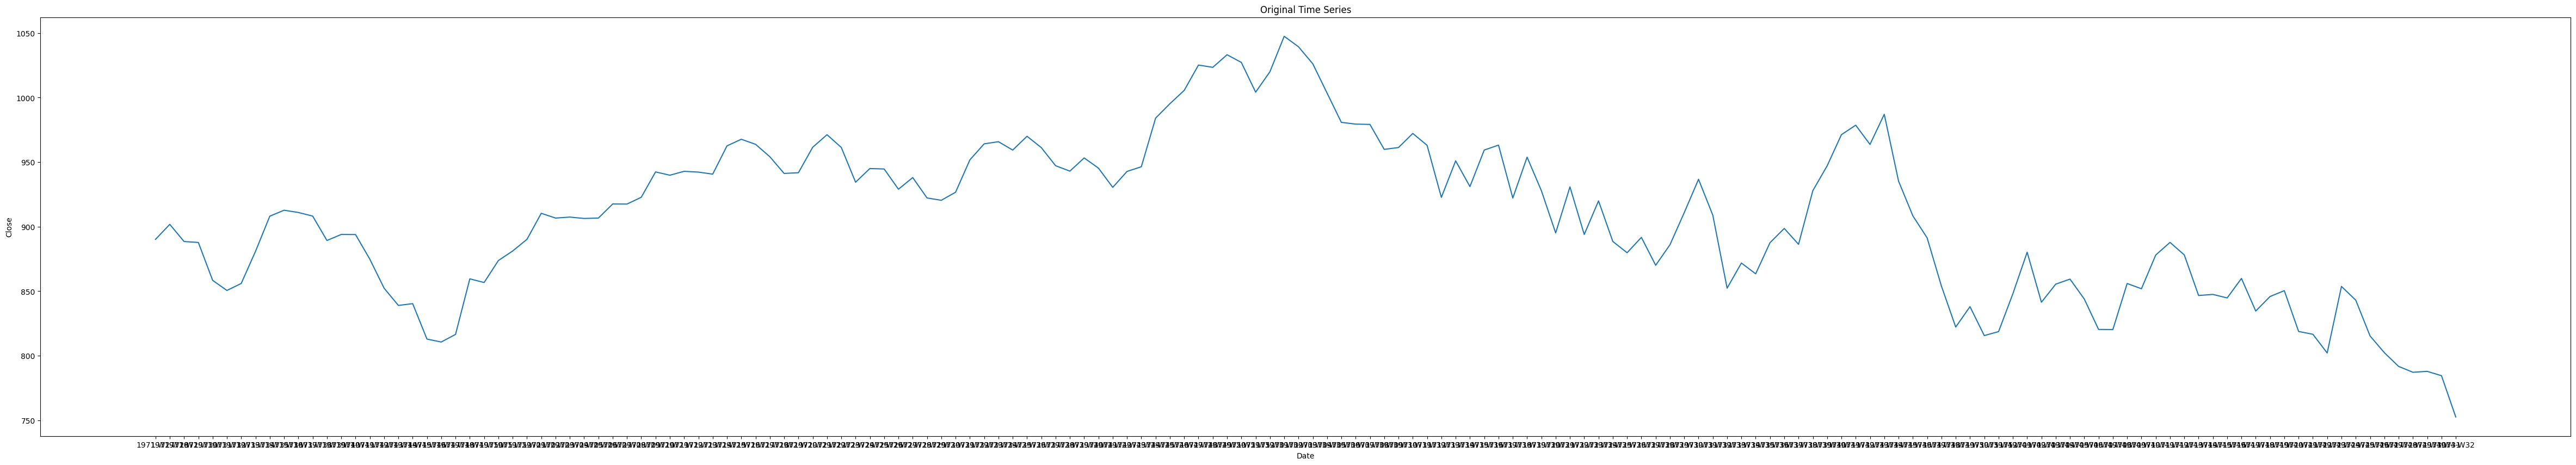

In [62]:
plt.figure(figsize=(60, 10))
plt.plot(df.index, df['Close'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

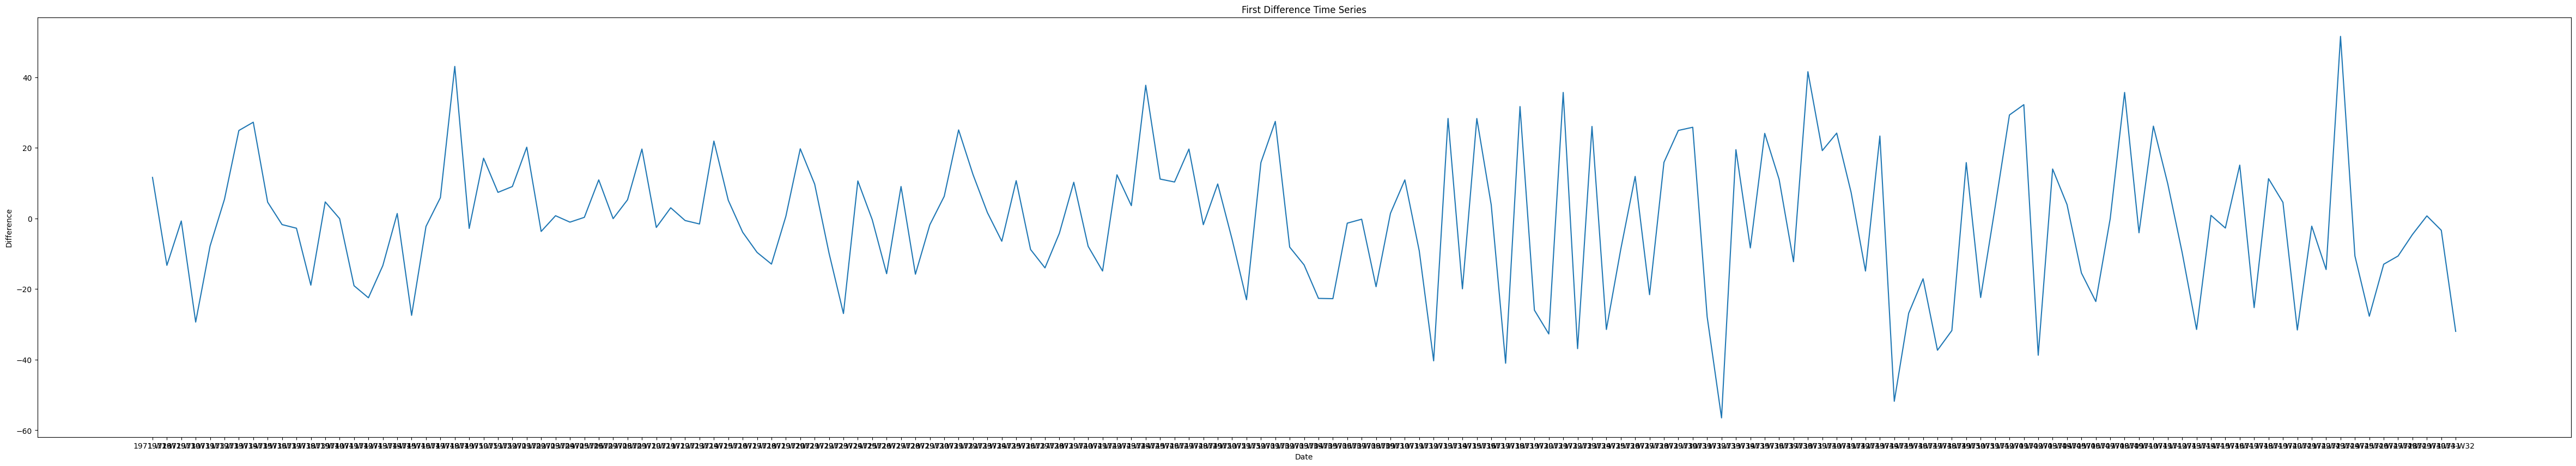

In [67]:
diff_series = df['Close'].diff().dropna()
plt.figure(figsize=(60, 10))
plt.plot(diff_series.index, diff_series)
plt.title('First Difference Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

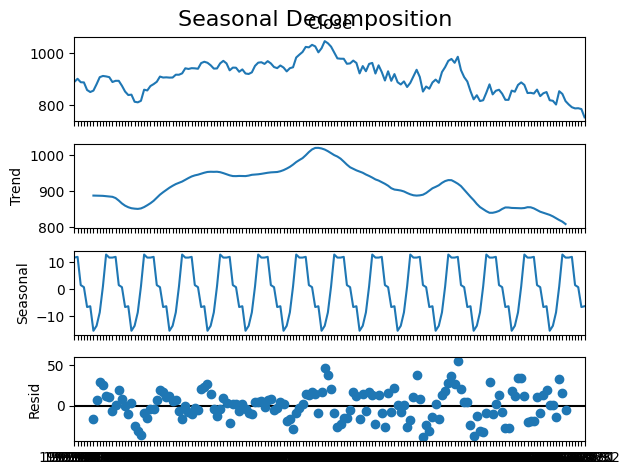

In [73]:
result = seasonal_decompose(df['Close'], model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

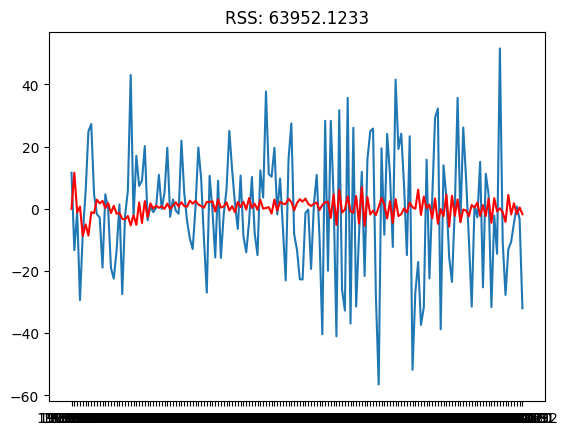

In [74]:
model = ARIMA(diff_series, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_series.index, diff_series)
plt.plot(diff_series.index, results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_series)**2))
plt.show()